**Prática de Segmentação de imagens**

In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

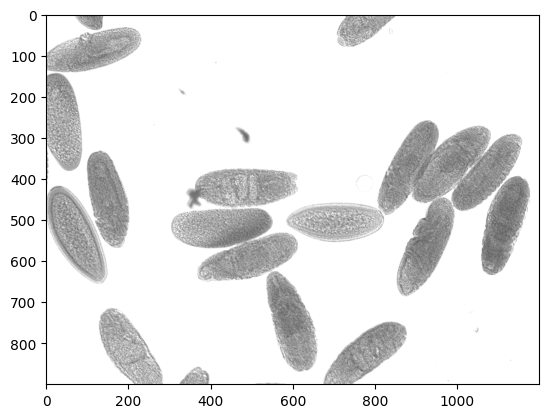

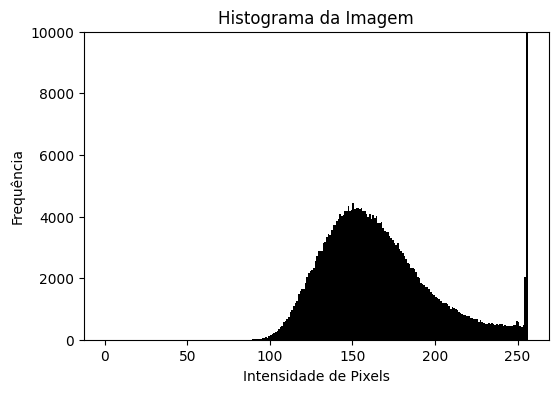

In [2]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

plt.figure(figsize=(6, 4))
plt.hist(img1.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histograma da Imagem')
plt.xlabel('Intensidade de Pixels')
plt.ylabel('Frequência')
plt.ylim(0, 10000) 
plt.show()

Um valor decidindo a olho o threshold poderia ser 225


2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

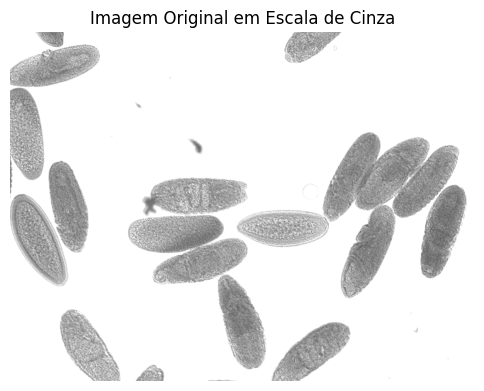

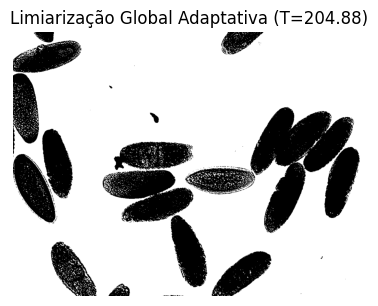

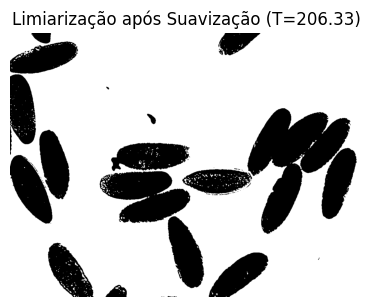

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_global_threshold(img, delta_T=1):
    
    T = np.mean(img)
    prev_T = 0  

    while abs(T - prev_T) > delta_T:
        G1 = img[img <= T]  # Pixels com intensidade <= T
        G2 = img[img > T]   # Pixels com intensidade > T
        
       
        if len(G1) > 0:
            mu1 = np.mean(G1)
        else:
            mu1 = 0  
        
        if len(G2) > 0:
            mu2 = np.mean(G2)
        else:
            mu2 = 0  
        
        
        prev_T = T
        T = (mu1 + mu2) / 2
    
    _, img_thresh = cv2.threshold(img, T, 255, cv2.THRESH_BINARY)
    
    return img_thresh, T


img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original em Escala de Cinza')
plt.axis('off')
plt.show()

# Aplicar sem suavização 
img_thresh, final_T = adaptive_global_threshold(img1, delta_T=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(img_thresh, cmap='gray')
plt.title(f'Limiarização Global Adaptativa (T={final_T:.2f})')
plt.axis('off')

plt.show()


# Aplicar suavização (Filtro Gaussiano)
img_suavizada = cv2.GaussianBlur(img1, (5, 5), 0)

img_thresh_suav, final_T_suav = adaptive_global_threshold(img_suavizada, delta_T=1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(img_thresh_suav, cmap='gray')
plt.title(f'Limiarização após Suavização (T={final_T_suav:.2f})')
plt.axis('off')

plt.show()

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

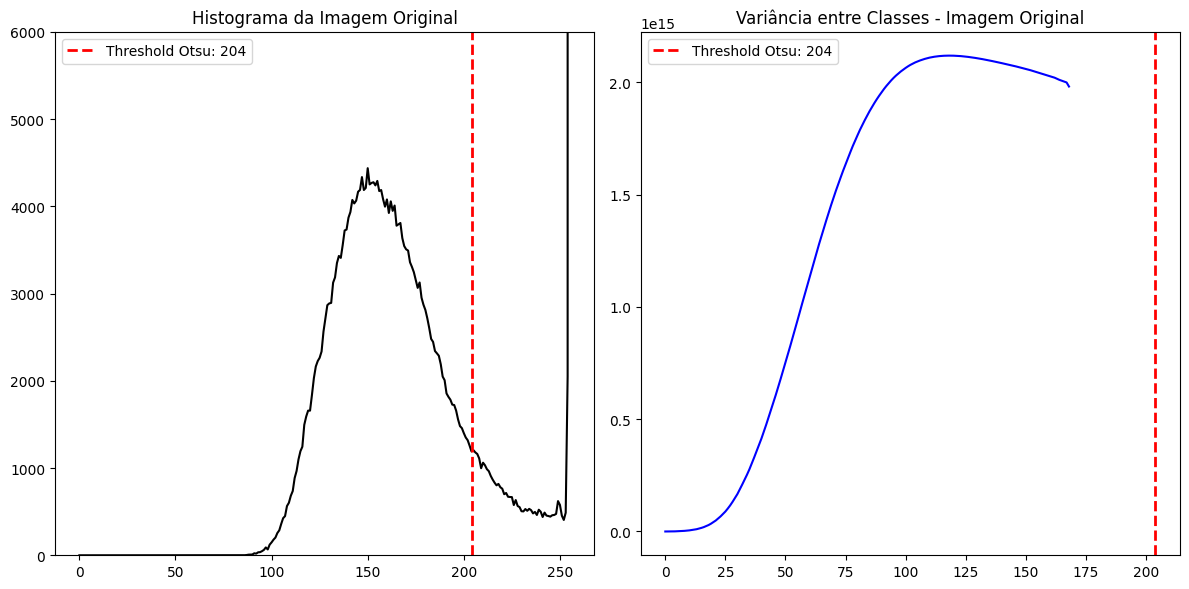

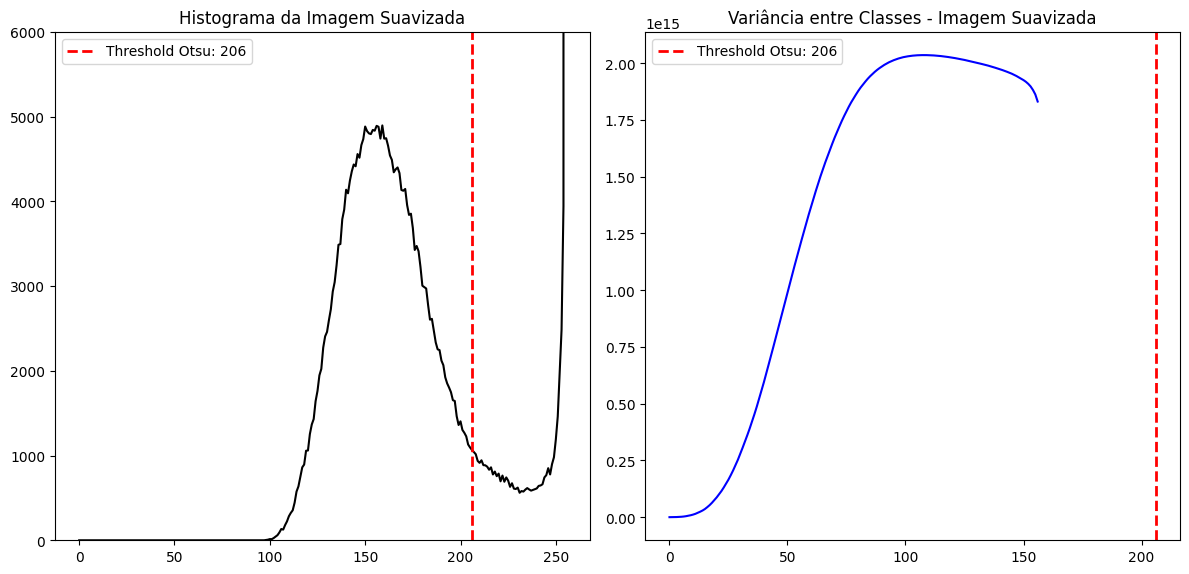

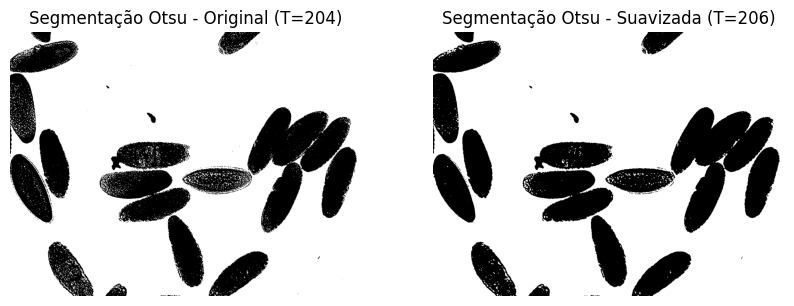

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_threshold(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    total = img.shape[0] * img.shape[1]
    prob = hist / total
    
    current_max, threshold = 0, 0
    sum_total, sumB = 0, 0
    wB, wF = 0, 0
    
    for i in range(256):
        sum_total += i * hist[i]
    
    var_between_classes = []
    
    for i in range(256):
        wB += hist[i]
        if wB == 0:
            continue
        
        wF = total - wB
        if wF == 0:
            break
        
        sumB += i * hist[i]
        mB = sumB / wB  # Média background
        mF = (sum_total - sumB) / wF  # Média foreground
        
        # Variância entre classes
        var_between = wB * wF * (mB - mF) ** 2
        var_between_classes.append(var_between)
        
        # Maximizar a variância entre classes
        if var_between > current_max:
            current_max = var_between
            threshold = i
    
    _, img_thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    
    return img_thresh, threshold, var_between_classes


img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

# Aplicar o algoritmo de Otsu na imagem original
img_otsu, thresh_otsu, var_between_otsu = otsu_threshold(img1)

# Aplicar o algoritmo de Otsu na imagem suavizada
img_suavizada = cv2.GaussianBlur(img1, (5, 5), 0)
img_otsu_suav, thresh_otsu_suav, var_between_otsu_suav = otsu_threshold(img_suavizada)


hist, bins = np.histogram(img1.flatten(), 256, [0, 256])

plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.plot(hist, color='black')
plt.title('Histograma da Imagem Original')
plt.axvline(thresh_otsu, color='r', linestyle='dashed', linewidth=2, label=f'Threshold Otsu: {thresh_otsu}')
plt.legend()
plt.ylim(0, 6000) 


# Variância entre classes
plt.subplot(1, 2, 2)
plt.plot(var_between_otsu, color='blue')
plt.title('Variância entre Classes - Imagem Original')
plt.axvline(thresh_otsu, color='r', linestyle='dashed', linewidth=2, label=f'Threshold Otsu: {thresh_otsu}')
plt.legend()

plt.tight_layout()
plt.show()

# Exibir o histograma com a variância entre classes para a imagem suavizada
hist_suav, bins_suav = np.histogram(img_suavizada.flatten(), 256, [0, 256])

plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.plot(hist_suav, color='black')
plt.title('Histograma da Imagem Suavizada')
plt.axvline(thresh_otsu_suav, color='r', linestyle='dashed', linewidth=2, label=f'Threshold Otsu: {thresh_otsu_suav}')
plt.legend()
plt.ylim(0, 6000) 

# Variância entre classes
plt.subplot(1, 2, 2)
plt.plot(var_between_otsu_suav, color='blue')
plt.title('Variância entre Classes - Imagem Suavizada')
plt.axvline(thresh_otsu_suav, color='r', linestyle='dashed', linewidth=2, label=f'Threshold Otsu: {thresh_otsu_suav}')
plt.legend()

plt.tight_layout()
plt.show()

# Exibir os resultados de segmentação
plt.figure(figsize=(10, 5))

# Imagem original segmentada
plt.subplot(1, 2, 1)
plt.imshow(img_otsu, cmap='gray')
plt.title(f'Segmentação Otsu - Original (T={thresh_otsu})')
plt.axis('off')

# Imagem suavizada segmentada
plt.subplot(1, 2, 2)
plt.imshow(img_otsu_suav, cmap='gray')
plt.title(f'Segmentação Otsu - Suavizada (T={thresh_otsu_suav})')
plt.axis('off')

plt.show()


4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

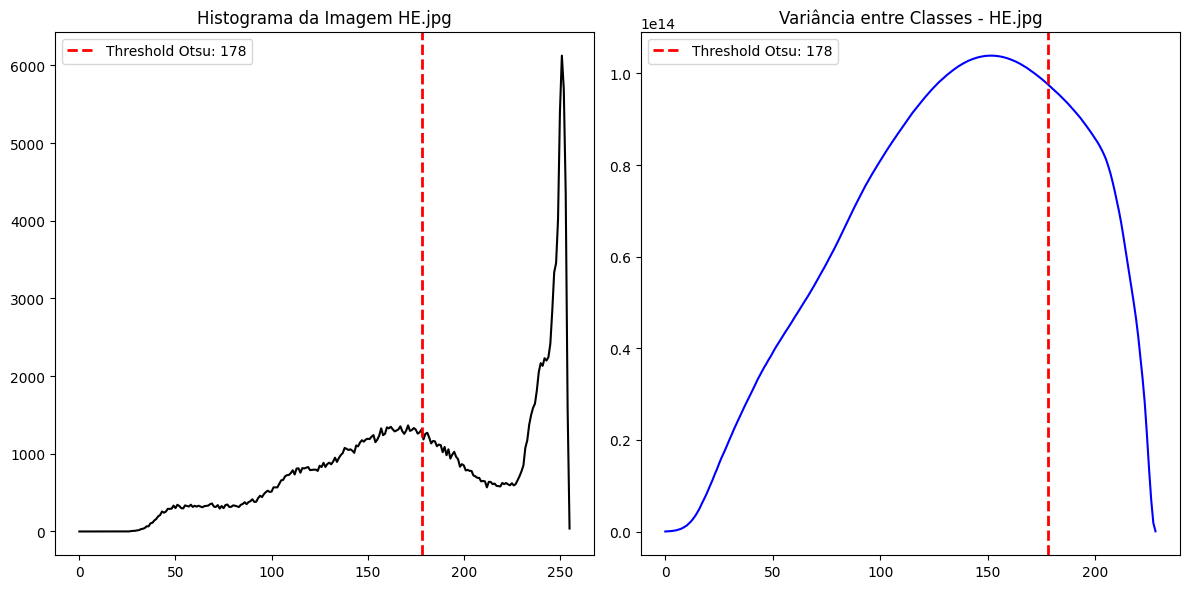

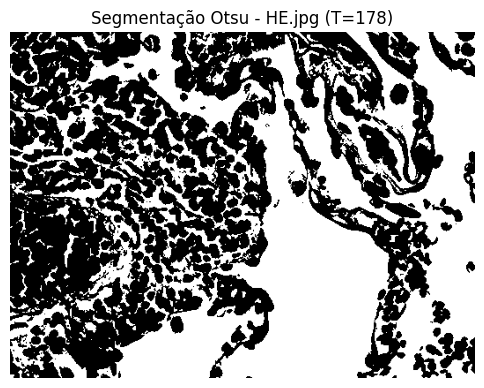

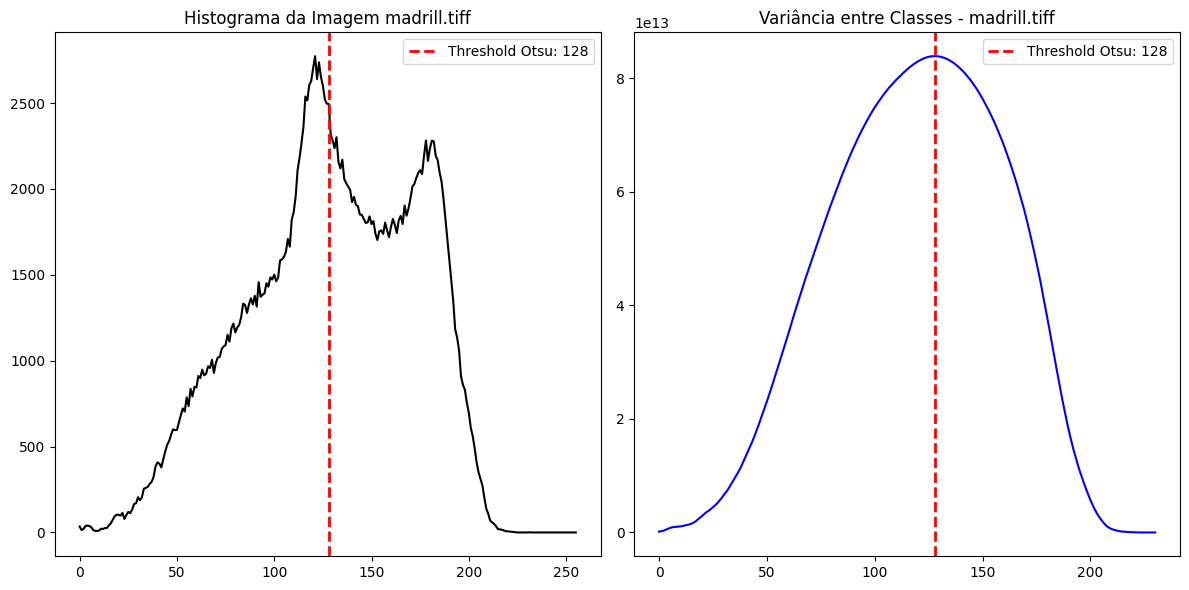

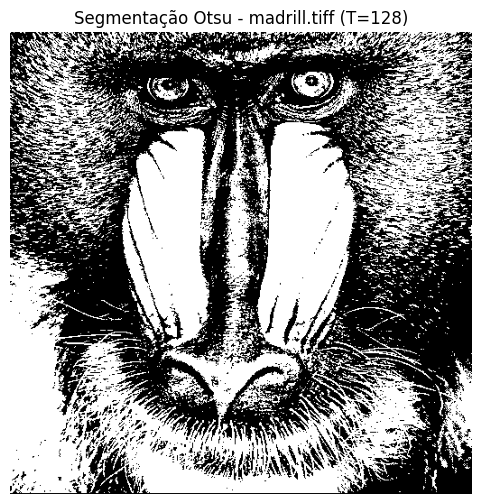

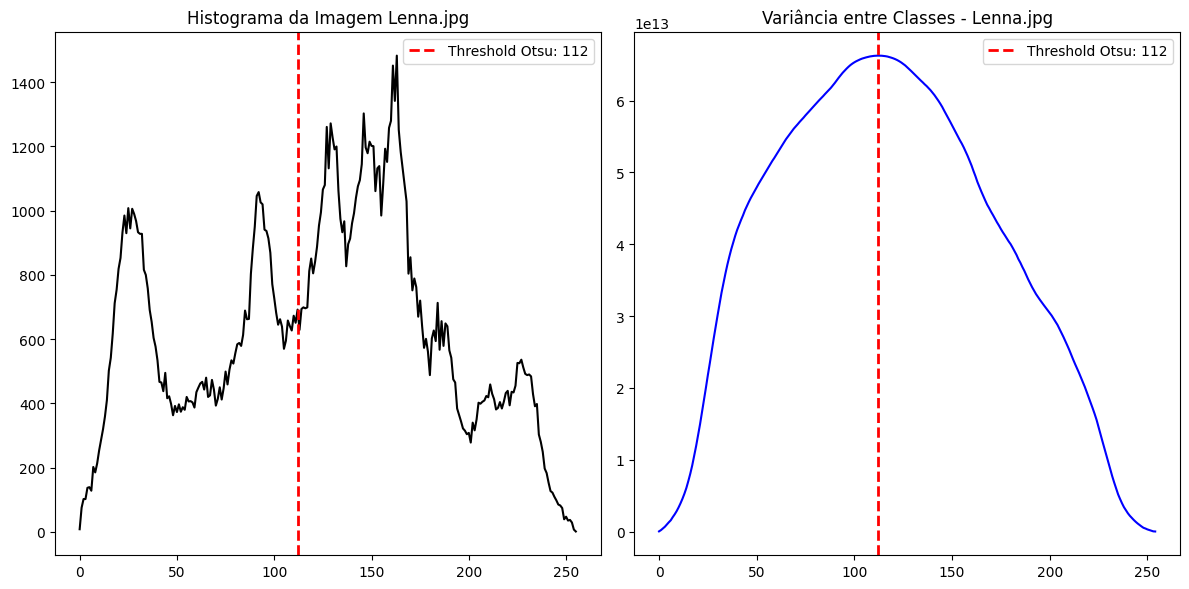

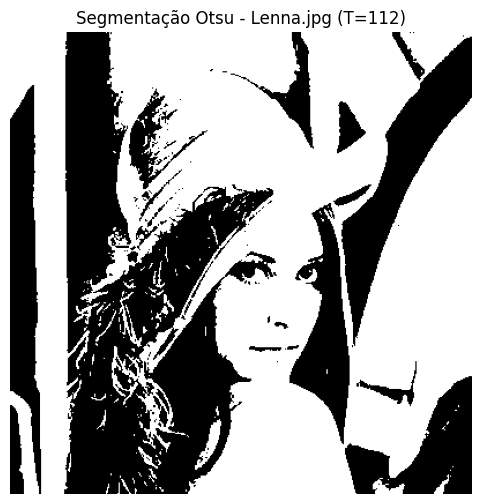

In [28]:
def apply_otsu_to_image(image_path, image_title):
    
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_otsu, thresh_otsu, var_between_otsu = otsu_threshold(img_gray)
    
    hist, bins = np.histogram(img_gray.flatten(), 256, [0, 256])
    
    plt.figure(figsize=(12, 6))
    
    # Histograma
    plt.subplot(1, 2, 1)
    plt.plot(hist, color='black')
    plt.title(f'Histograma da Imagem {image_title}')
    plt.axvline(thresh_otsu, color='r', linestyle='dashed', linewidth=2, label=f'Threshold Otsu: {thresh_otsu}')
    plt.legend()
    
    # Variância entre classes
    plt.subplot(1, 2, 2)
    plt.plot(var_between_otsu, color='blue')
    plt.title(f'Variância entre Classes - {image_title}')
    plt.axvline(thresh_otsu, color='r', linestyle='dashed', linewidth=2, label=f'Threshold Otsu: {thresh_otsu}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Exibir a imagem binarizada após Otsu
    plt.figure(figsize=(6, 6))
    plt.imshow(img_otsu, cmap='gray')
    plt.title(f'Segmentação Otsu - {image_title} (T={thresh_otsu})')
    plt.axis('off')
    plt.show()

# Aplicar o método de Otsu para as três imagens solicitadas
apply_otsu_to_image("HE.jpg", "HE.jpg")
apply_otsu_to_image("madrill.tiff", "madrill.tiff")
apply_otsu_to_image("Lenna.jpg", "Lenna.jpg")